In [23]:
from importlib import reload
from src import parsing
from src import model_path
from src import models_path
from src import model_goal
from src import models_goal
from src import model_interface
from src import visualization
from src import util
from src import config
reload(parsing)
reload(model_path)
reload(models_path)
reload(model_goal)
reload(models_goal)
reload(model_interface)
reload(visualization)
reload(util)
reload(config)

import seaborn
import numpy as np
import pandas as pd

In [ ]:
# file used for evaluating the atc dataset
file_path = "data/medium_aa.csv"

In [30]:
## load raw data into pandas
## modified from parsing.py:
df = pd.read_csv(file_path, names=["time", "id", "x", "y", "z", "velocity", "motion_angle", "facing_angle"])
df = df.drop(columns=['z', 'velocity', 'motion_angle', 'facing_angle'])
df['time'] = pd.to_datetime(df['time'], unit='s')

Min -41020, Max 48051, Mean 270.2975155, Std 19186.293111789735


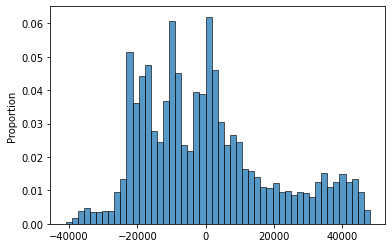

In [31]:
# for this we are only interested in the x and y columns
# combine these in a single 1D numpy array
raw_data = df.loc[:, ['x', 'y']].to_numpy().flatten()
seaborn.histplot(data=raw_data, bins=50, stat='proportion')

print(f"Min {raw_data.min()}, Max {raw_data.max()}, Mean {raw_data.mean()}, Std {raw_data.std()}")

In [32]:
# scale df
df['x'] = df['x'] / config.SCALING_FACTOR
df['y'] = df['y'] / config.SCALING_FACTOR

Min -4.102, Max 4.8051, Mean 0.02702975155000001, Std 1.9186293111789734


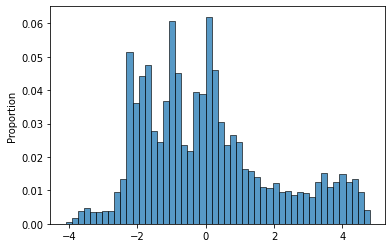

In [33]:
raw_data = df.loc[:, ['x', 'y']].to_numpy().flatten()
seaborn.histplot(data=raw_data, bins=50, stat='proportion')

print(f"Min {raw_data.min()}, Max {raw_data.max()}, Mean {raw_data.mean()}, Std {raw_data.std()}")

In [2]:
# load testing data and format it for the model
train_data, eval_data, test_data = parsing.parse_atc_day(file_path, train_ratio=0.9, eval_ratio=0.1)

100%|██████████| 1224/1224 [00:16<00:00, 72.44it/s] 


1224 unique ids found. Generated 248765 sequences total from 697 trajectories.
Skipped 503 trajectories.
        353 too short
        150 frequency issues (like gaps)
    
Skipped 455 sequences (0.183%) because of abnormally high absolute value after normalization
Dividing 697 human trajectories: 557 training, 69 eval, 71 test
train (202617, 40, 2) float64 (202617, 25) float32 (202617, 40, 2) float64
eval (23245, 40, 2) float64 (23245, 25) float32 (23245, 40, 2) float64
test (22903, 40, 2) float64 (22903, 25) float32 (22903, 40, 2) float64


Min -0.9973233759822279, Max 0.9990387629906906, Mean 3.59256009576268e-05, Std 0.1699921601345119


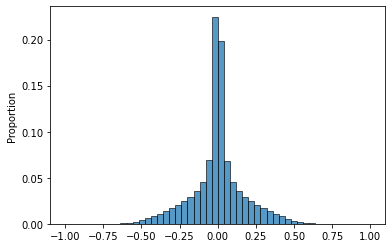

In [34]:
raw_data_x = train_data[0].flatten()
raw_data_y = train_data[2].flatten()
raw_data = np.concatenate((raw_data_x, raw_data_y))

seaborn.histplot(data=raw_data, bins=50, stat='proportion')
print(f"Min {raw_data.min()}, Max {raw_data.max()}, Mean {raw_data.mean()}, Std {raw_data.std()}")

<AxesSubplot:ylabel='Proportion'>

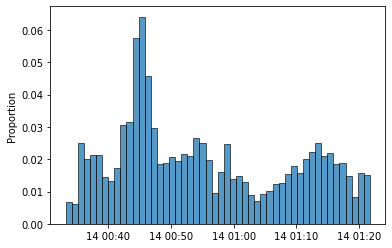

In [35]:
raw_data = df.loc[:, ['time']].to_numpy().flatten()
seaborn.histplot(data=raw_data, bins=50, stat='proportion')